# MBTI Analysis

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types.

This project is use python to analyze the MBTIs validity and ability to predict language styles and behaviour online.
Production of a machine learning algorithm that can attempt to determine a person’s personality type based on some text they have written.

## 1. Distribution of personality types

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import gensim
from gensim.utils import simple_preprocess 
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from textblob import TextBlob
from tqdm import tqdm
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('cleaned_raw.csv')
data = data.drop(data.columns[0], axis=1)
print(data.shape)
data.head()

(8675, 2)


,type,final
0,INFJ,youtube youtube enfp intj moments youtube spor...
1,ENTP,im finding lack posts alarming sex boring posi...
2,INTP,good one youtube course say know thats blessin...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,youre fired thats another silly misconception ...


Counter({'INFP': 1832, 'INFJ': 1470, 'INTP': 1304, 'INTJ': 1091, 'ENTP': 685, 'ENFP': 675, 'ISTP': 337, 'ISFP': 271, 'ENTJ': 231, 'ISTJ': 205, 'ENFJ': 190, 'ISFJ': 166, 'ESTP': 89, 'ESFP': 48, 'ESFJ': 42, 'ESTJ': 39})


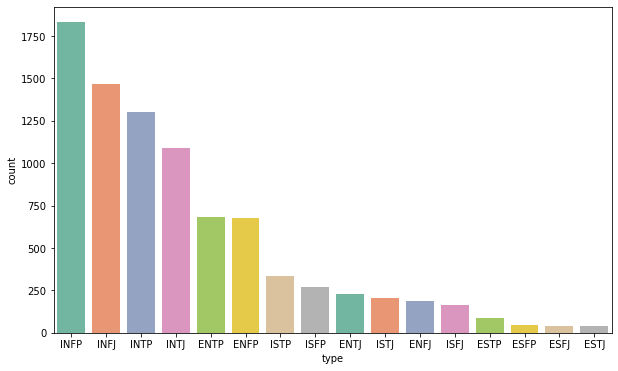

In [4]:
count = Counter(data['type'])
print(count)
sorted_type = sorted(count, key=count.get, reverse=True)
plt.figure(figsize = [10,6])
sns.countplot(x=data['type'], palette ="Set2",order = sorted_type)

## 2. Keywords related to different personality type

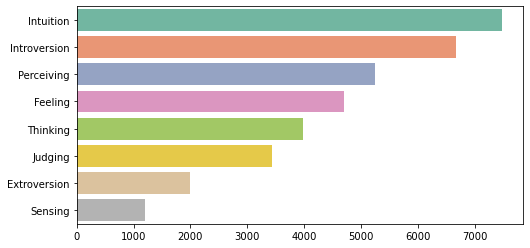

In [5]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}


m = pd.DataFrame()
for c in 'INTJESFP':
    m[c] = data['type'].apply(lambda x: 1 if c in x else 0)
#m.head()
bar_m = m.sum().sort_values(ascending=False).rename(lambda x: mapping[x])
plt.figure(figsize = [8,4])
sns.barplot(x=bar_m.values,y=bar_m.index,palette ="Set2")

In [27]:
def cal_words_importance(corpus,n,tf):
    tfidf_matrix = (tf.transform(corpus)).sum(axis=0) 
    score = [(w,tfidf_matrix[0,i]) for w,i in tf.vocabulary_.items()]
    score_n =sorted(score, key = lambda x: x[1], reverse=True)[:n]
    return score_n

top_words = {}
tf = TfidfVectorizer().fit(data['final']) #Learn vocabulary and idf from training set.
ls = data['type'].unique()
for personality in tqdm(ls):
    sub_data = data[data['type'] == personality]
    res = cal_words_importance(sub_data['final'],10,tf)
    top_words[personality] = res

  6%|▋         | 1/16 [00:00<00:14,  1.05it/s]

[('im', 131.733415777152), ('like', 105.48093477641956), ('infj', 91.62867355028744), ('dont', 80.35851564957527), ('think', 80.34235624547013), ('people', 76.85116800911089), ('youtube', 67.7023173587708), ('know', 63.191512561842536), ('really', 59.82256634585056), ('ive', 57.722513799240936)]


 12%|█▎        | 2/16 [00:01<00:11,  1.22it/s]

[('im', 55.90077092338921), ('entp', 51.838571964805844), ('like', 47.59773093602867), ('dont', 36.97862470621891), ('think', 35.815794630757814), ('people', 33.11438919936911), ('entps', 29.22877343321865), ('one', 27.252469936958793), ('know', 26.083210337466486), ('would', 25.540951192851992)]


 19%|█▉        | 3/16 [00:02<00:10,  1.23it/s]

[('im', 103.39959878999939), ('like', 87.35753926650524), ('dont', 74.6734676545683), ('intp', 74.66036413299643), ('think', 66.28425852455703), ('youtube', 65.28240100249654), ('people', 64.9412779751147), ('would', 54.51054260611907), ('one', 49.301935909828906), ('know', 47.748558307025256)]


 25%|██▌       | 4/16 [00:02<00:09,  1.28it/s]

[('im', 78.98574156416562), ('like', 70.29827955797543), ('intj', 68.76346756129252), ('dont', 60.707498404174444), ('people', 54.65289326855768), ('think', 51.6372537870775), ('youtube', 49.48802591840269), ('would', 45.722323529680786), ('one', 42.24026008740312), ('know', 40.57958010994121)]


 31%|███▏      | 5/16 [00:03<00:06,  1.59it/s]

[('entj', 20.232838115050765), ('im', 17.690642341747104), ('like', 15.134277033368722), ('dont', 12.612656863144178), ('think', 12.085397976107645), ('people', 11.072040882635088), ('entjs', 9.925817664998348), ('would', 9.331538573466265), ('youtube', 8.614033648712665), ('one', 8.586860086777518)]


 38%|███▊      | 6/16 [00:03<00:05,  1.96it/s]

[('im', 18.56473461944555), ('enfj', 16.915033168018415), ('like', 14.571680661061), ('think', 11.339172457086729), ('enfjs', 11.1770010149074), ('people', 10.540053204306675), ('dont', 10.1982509407253), ('really', 8.748203216810015), ('know', 8.668475222356355), ('would', 7.541899321935329)]


 44%|████▍     | 7/16 [00:04<00:06,  1.50it/s]

[('im', 174.90521070638383), ('like', 142.80609198003515), ('think', 105.08199686638825), ('dont', 104.36976822897813), ('infp', 99.63173516401014), ('youtube', 98.85044828392958), ('people', 95.34754851710835), ('really', 85.68880565885178), ('ive', 77.67001891254516), ('know', 76.4777437092448)]


 50%|█████     | 8/16 [00:05<00:05,  1.60it/s]

[('im', 64.13166560031469), ('like', 53.18181380661406), ('enfp', 52.900292876670996), ('think', 36.51074094501295), ('dont', 35.5958814062079), ('people', 33.09626349965548), ('really', 30.33400453352482), ('know', 29.183166805691524), ('enfps', 27.338673531823012), ('love', 26.884515368879214)]


 56%|█████▋    | 9/16 [00:05<00:03,  1.91it/s]

[('im', 26.955777718632586), ('isfp', 21.974897007458797), ('like', 21.484406314951787), ('youtube', 17.88838401511691), ('dont', 15.511360766341415), ('think', 14.451442809065021), ('really', 12.826277407577608), ('people', 12.136377047690758), ('isfps', 10.407655884231458), ('know', 10.229089731383764)]


 62%|██████▎   | 10/16 [00:05<00:02,  2.19it/s]

[('im', 29.338234385506603), ('istp', 26.32642943592303), ('like', 23.050183176255725), ('dont', 21.735425370675973), ('youtube', 19.384592579184915), ('think', 15.776107537782096), ('people', 15.689790493666166), ('get', 13.767782777246282), ('istps', 13.622979939660578), ('would', 12.982098207797572)]


 69%|██████▉   | 11/16 [00:05<00:01,  2.59it/s]

[('isfj', 17.217232389489183), ('im', 17.214912575907665), ('like', 12.117301266651427), ('think', 9.608942395878682), ('dont', 9.441366691339418), ('isfjs', 9.174528795589936), ('youtube', 8.899774158065311), ('people', 7.70505352360704), ('really', 7.404585396320023), ('know', 6.657090394436929)]


 81%|████████▏ | 13/16 [00:06<00:00,  3.42it/s]

[('istj', 17.581719512442728), ('im', 17.051705297077078), ('like', 14.91119437047105), ('dont', 12.658555737821496), ('think', 9.252558539083587), ('youtube', 8.586813497305728), ('people', 8.486216904364536), ('know', 7.928538382430548), ('one', 7.848485674564395), ('would', 7.737590048938902)]
[('estp', 9.640648731730728), ('im', 7.404457813626132), ('like', 6.906338630240614), ('dont', 5.528513309495725), ('estps', 4.787758061967407), ('think', 4.727823634286338), ('people', 4.244020195690494), ('youtube', 4.129102208279349), ('get', 4.034111414134513), ('know', 3.709732762188909)]


 88%|████████▊ | 14/16 [00:06<00:00,  3.86it/s]

[('im', 4.043608865122327), ('esfp', 3.936965052695745), ('like', 3.281399077536115), ('dont', 2.7237907370946575), ('think', 2.5098017641360184), ('people', 2.162119454792508), ('youtube', 1.961953712520599), ('really', 1.8686967748336247), ('know', 1.8538478482222422), ('ive', 1.63641029080759)]


 94%|█████████▍| 15/16 [00:06<00:00,  4.04it/s]

[('estj', 3.9500466510644876), ('im', 3.089534749492181), ('estjs', 2.635655419479487), ('like', 2.221196243615097), ('think', 2.1185077510835795), ('dont', 2.0707380845518624), ('people', 1.843482695387269), ('would', 1.520830107338737), ('know', 1.4527548073353214), ('youtube', 1.356073478060193)]


100%|██████████| 16/16 [00:06<00:00,  2.32it/s]

[('esfj', 5.790543256300827), ('esfjs', 4.35492340421442), ('im', 4.087789149029297), ('like', 3.387123487489271), ('think', 2.806823405788415), ('dont', 2.43247163505305), ('people', 2.4314810300571748), ('know', 1.9104357311478228), ('type', 1.7943952462206432), ('really', 1.696879925027505)]


In [7]:
all_docs = []
for s in tqdm('EI'):
    sub_data = data[data['type'].str.contains(s)]
    str_ls = "".join(sub_data['final'])
    all_docs.append(str_ls)
vec = TfidfVectorizer(max_features=2000)
transformed = vec.fit_transform(all_docs) 

100%|██████████| 2/2 [00:00<00:00, 16.55it/s]


In [13]:
words_score = {}
transformed_documents_as_array = transformed.toarray()
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vec.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    words_score[ls[counter]] = one_doc_as_df[:20]

In [14]:
from ipywidgets import widgets,interact,interactive,fixed
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from string import digits 
import spacy
#import en_core_web_sm

In [29]:
def plot_bar(personality):
    
    importance = [top_words[personality][i][1] for i in range(10)]
    words = [top_words[personality][i][0] for i in range(10)]
    plt.figure(figsize=[16,5])

    sns.barplot(y = words,x = importance,palette ="Set2")
    plt.title('Important Words')
    plt.xlabel('TF-IDF Score')

interact(plot_bar,Category=top_words.keys(),mytitle=fixed('Words Importance'),personality = top_words.keys())


interactive(children=(Dropdown(description='personality', options=('INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'EN…

<function __main__.plot_bar(personality)>

In [11]:
###funtion for cloud that Im going to call with interact  ######  
stop_words = stopwords.words('english')
stop_words.extend(['im','like','dont','think','people','know','would','one',
                   'thing','get','well','really','ive','type','time',
                   'INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP', 
                   'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ',
                   'ISTPS','ISFPS','ESFJS'])
def load_mask_image(path):
    mask = np.array(Image.open(path))
    #mask[mask > 200] = 255
    #mask[mask <= 200] = 0
    return mask

mask = load_mask_image('mask.png')
def makingclouds(personality,maximum):
    personality_data = data[data['type'] == personality]
    text = " ".join(personality_data['final'].tolist())
    wc = WordCloud(background_color="white", max_words=maximum, mask=mask,
                   stopwords=stop_words, contour_width=3)

    # Generate a wordcloud
    wc.generate(text)

    # show
    plt.figure(figsize=[20,6])
    plt.subplot(121)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

interact(makingclouds, Category=ls, personality = ls, maximum=[20,50,100,150])

interactive(children=(Dropdown(description='personality', options=('INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'EN…

<function __main__.makingclouds(personality, maximum)>

In [33]:

cv = CountVectorizer(max_features=2000, strip_accents='ascii')
result = cv.fit_transform(data['final'])

tf_vec=TfidfVectorizer(use_idf=True,max_features=2000)
result = tf_vec.fit_transform(data['final'])


m_new = pd.concat([m, pd.DataFrame(result.toarray(), columns=['__' + k for k in cv.vocabulary_.keys()])],axis=1)
words_col = [col for col in m_new.columns if col.startswith('__') and len(col) > 5]
tf = m_new[words_col]#.T[m_new[words_col].mean() >= 0.5].T

def unique_words_plot(personality1, personality2):
    a = personality1
    b = personality2
    a_avg = tf[m_new[a] == 1].mean() 
    b_avg = tf[m_new[b] == 1].mean()
    ratio = a_avg / b_avg
    bar_plot = ratio.sort_values().rename(lambda x: x[2:]).tail(10)
    plt.figure(figsize=[16,4])
    sns.barplot(x=bar_plot.values,y=bar_plot.index,palette ="Set2")
    plt.title(mapping[a] + ' vs ' + mapping[b])
    plt.xlabel('Importance Ratio')
    

interact(unique_words_plot,mytitle=fixed('Words Importance'),personality1 = mapping.keys(),personality2 = mapping.keys())


interactive(children=(Dropdown(description='personality1', options=('I', 'E', 'N', 'S', 'T', 'F', 'J', 'P'), v…

<function __main__.unique_words_plot(personality1, personality2)>

## Classification

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
 
df = data[data.type.isin([x[0] for x in count.most_common(6)])]
vect = CountVectorizer(stop_words='english') 
X =  vect.fit_transform(df["final"]) 

le = LabelEncoder()
y = le.fit_transform(df["type"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

#Evaluating Acccuarcy across four categories indipendently 
def acc_by_category(ytest_predicted, y_test, le):
    ype = np.array(list("".join(le.inverse_transform(ytest_predicted))))
    ye = np.array(list("".join(le.inverse_transform(y_test))))
    return (ype == ye).mean()

clf = MultinomialNB()
clf.fit(X_train, y_train)

ytrain_predict = clf.predict(X_train)
print("Overall Train Accuracy:", np.mean(ytrain_predict == y_train))

ytest_predicted = clf.predict(X_test)
print("Overall Test Accuracy:", np.mean(ytest_predicted == y_test))
print("=============================================")
print("Categorical Train Accuracy:", acc_by_category(ytrain_predict, y_train, le))
print("Categorical Test Accuracy:", acc_by_category(ytest_predicted, y_test, le))

Overall Train Accuracy: 0.8335695166115572
Overall Test Accuracy: 0.49291784702549574
Categorical Train Accuracy: 0.9354432372854669
Categorical Test Accuracy: 0.8218838526912181


In [334]:
def plot_acc_catgory(ytest_predicted,y_test,le):

    dft = pd.DataFrame(list("".join(le.inverse_transform(ytest_predicted))),columns=["pred"])
    y = pd.DataFrame(list("".join(le.inverse_transform(y_test))))
    dft["count"] =  1
    dft["same"] = (dft["pred"] == y[0])
    dft["same"] = dft["same"].astype(int)
    group = dft.groupby("pred").sum()
    group.sort_values("count", ascending=False, inplace=True)
    
    return group

In [335]:
print(plot_acc_catgory(ytest_predicted,y_test,le))


      count  same
pred             
N       706   706
I       701   568
F       534   380
P       501   377
J       205   132
T       172   154
E         5     4


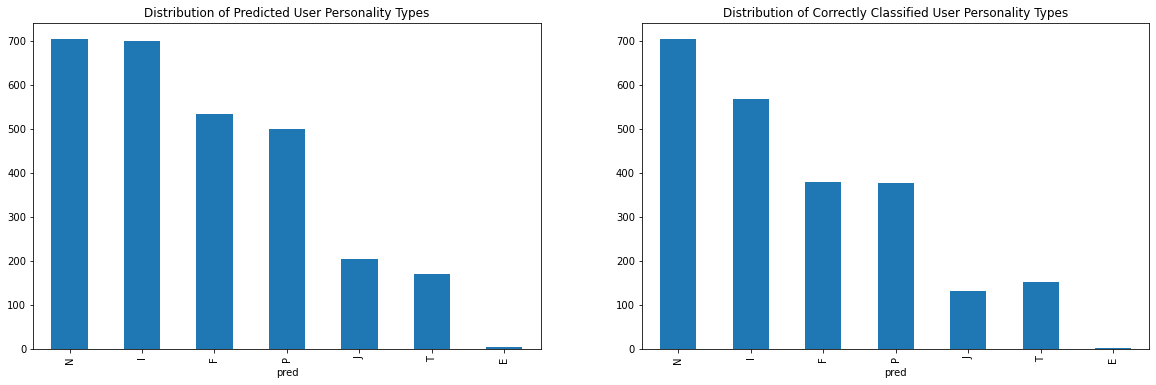

In [341]:
f, ax = plt.subplots(1,2,figsize=(20,6))
groupsn["count"].plot(kind="bar", title="Distribution of Predicted User Personality Types", ax=ax[0]);
groupsn["same"].plot(kind="bar", title="Distribution of Correctly Classified User Personality Types", ax=ax[1]);